In [1]:
from simulation_lab import SimulationLab
import chart_studio.plotly as py
import plotly_keys as pk
import chart_studio
chart_studio.tools.set_credentials_file(username=pk.username, api_key=pk.key)
import numpy as np
np.random.seed(13)

<h1>Notebook de simulación</h1>

En esta notebook se verán 4 casos de simulaciones para los siguientes 3 métodos distintos enfocados en atacar un problema de Multi Armed Bandit bernoulli:
* Epsilon-Greedy sin y con epsilon decay (epsilon = epsilon/n para cada paso n)
* Upper Confidence Bound (UCB)
* Thompson Sampling

Presentaremos 4 casos con distintas características para evaluar los modelos frente a distintos contextos, realizando para cada uno de ellos 10 repeticiones de 1000 iteraciones, promediando luego los valores obtenidos en cada repetición.

---

# Caso 1
En este caso tenemos 3 máquinas con diferencias marcadas en sus probabilidades, siendo las mismas 0.3, 0.5 y 0.9

In [2]:
sl = SimulationLab(
    actual_probs=[.3, .5, .9],
    repetitions=10,
    iterations=1000,
    epsilon=.15
)
sl.simulate()

Starting simulation...


 10%|█         | 1/10 [00:05<00:49,  5.55s/it]

Saving repetition 0...


 20%|██        | 2/10 [00:10<00:42,  5.30s/it]

Saving repetition 1...


 30%|███       | 3/10 [00:15<00:36,  5.20s/it]

Saving repetition 2...


 40%|████      | 4/10 [00:20<00:30,  5.14s/it]

Saving repetition 3...


 50%|█████     | 5/10 [00:25<00:25,  5.11s/it]

Saving repetition 4...


 60%|██████    | 6/10 [00:30<00:20,  5.10s/it]

Saving repetition 5...


 70%|███████   | 7/10 [00:36<00:15,  5.12s/it]

Saving repetition 6...


 80%|████████  | 8/10 [00:41<00:10,  5.11s/it]

Saving repetition 7...


 90%|█████████ | 9/10 [00:46<00:05,  5.10s/it]

Saving repetition 8...


100%|██████████| 10/10 [00:51<00:00,  5.13s/it]


Saving repetition 9...
Success!
Starting machine selection evolution calculus...


100%|██████████| 4/4 [00:06<00:00,  1.69s/it]

Success!


### Selección de máquinas

Como podemos ver en el gráfico de abajo, a medida que avanzan las iteraciones, los modelos de **UCB** y **Thompson Sampling** son los que parecieran funcionar de una forma más eficiente. En cuanto a los modelos de **e-greedy**, vemos que el que tiene epsilon-decay es el que selecciona la máquina óptima una mayor cantidad de veces, esto tiene sentido, ya que es un modelo que, a medida que avanzamos en las iteraciones, tiende a explorar cada vez menos y a explotar más.

In [3]:
fig = sl.plot_mab_selection()
py.iplot(fig, filename='evolucion_seleccion_caso1', sharing='public')

### Regret/n

Cuando pasamos a analizar el comportamiento del Regret/n en función de n, vemos que, efectivamente, **UCB** y **Thompson sampling** son los modelos que más se acercan al 0 a medida que n tiene a infinito, siendo **Thompson sampling** el obtiene valores más bajos.

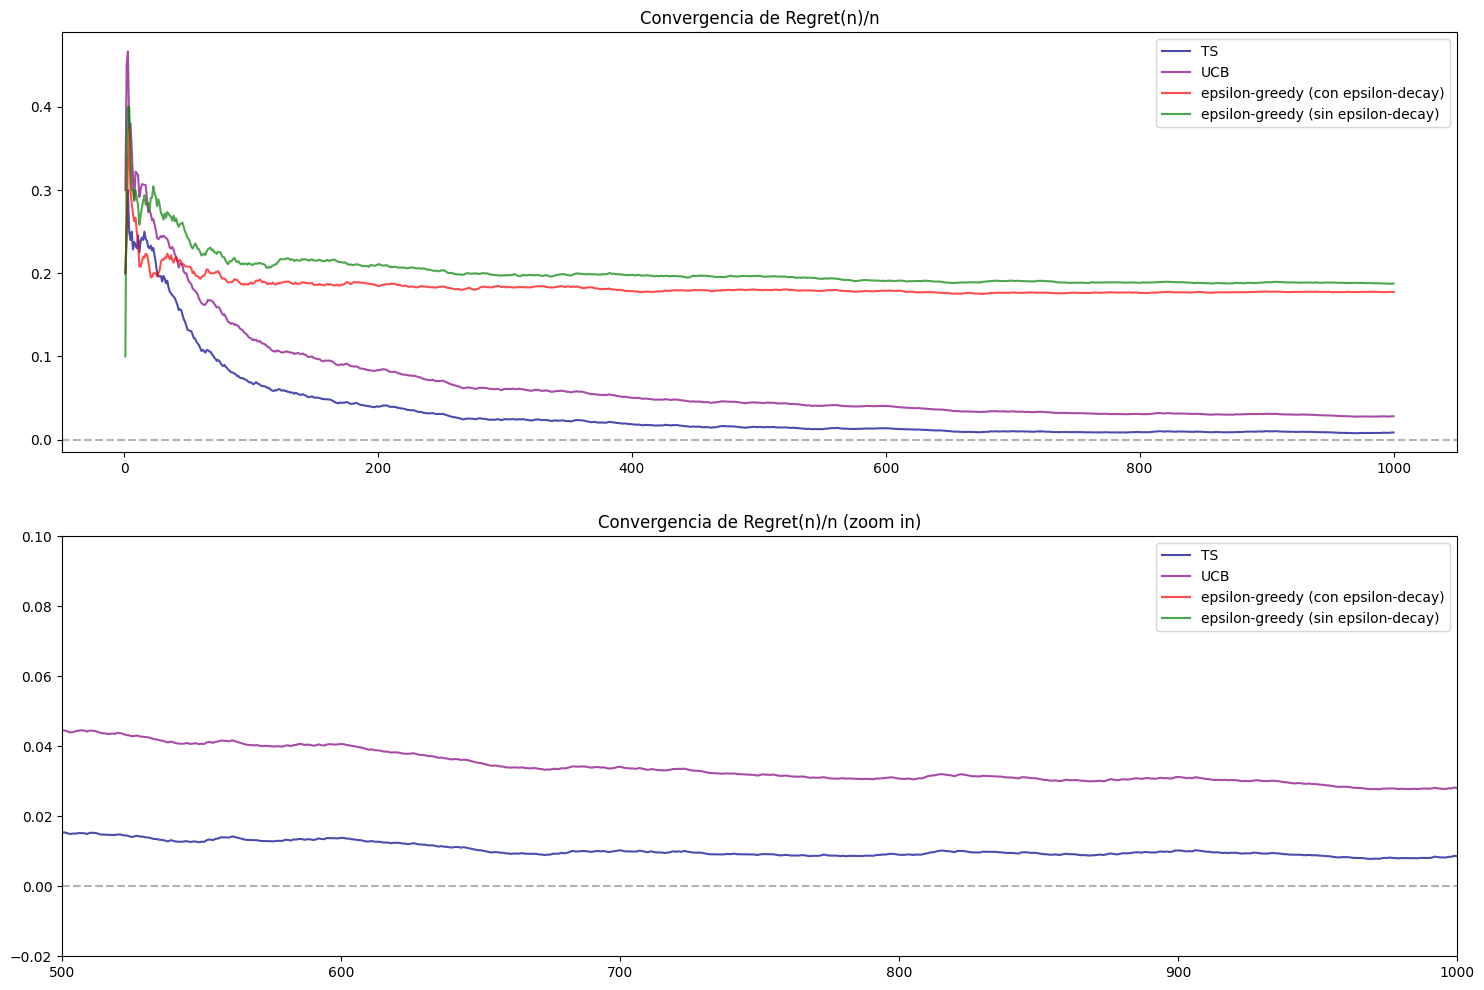

In [4]:
sl.plot_regret()

### Proporcionalidad vs $\sqrt{n}$

Podemos ver que esto se condice en el último gráfico, donde comparamos la velocidad de crecimiento del Regret/n contra $\sqrt{n}$, ya que los modelos de **UCB** y **Thompson sampling** son los 2 que están más cerca de crecer a nivel $\sqrt{n}$, siendo **Thomspon sampling** el de mejor performance por crecer a una velocidad aun menor

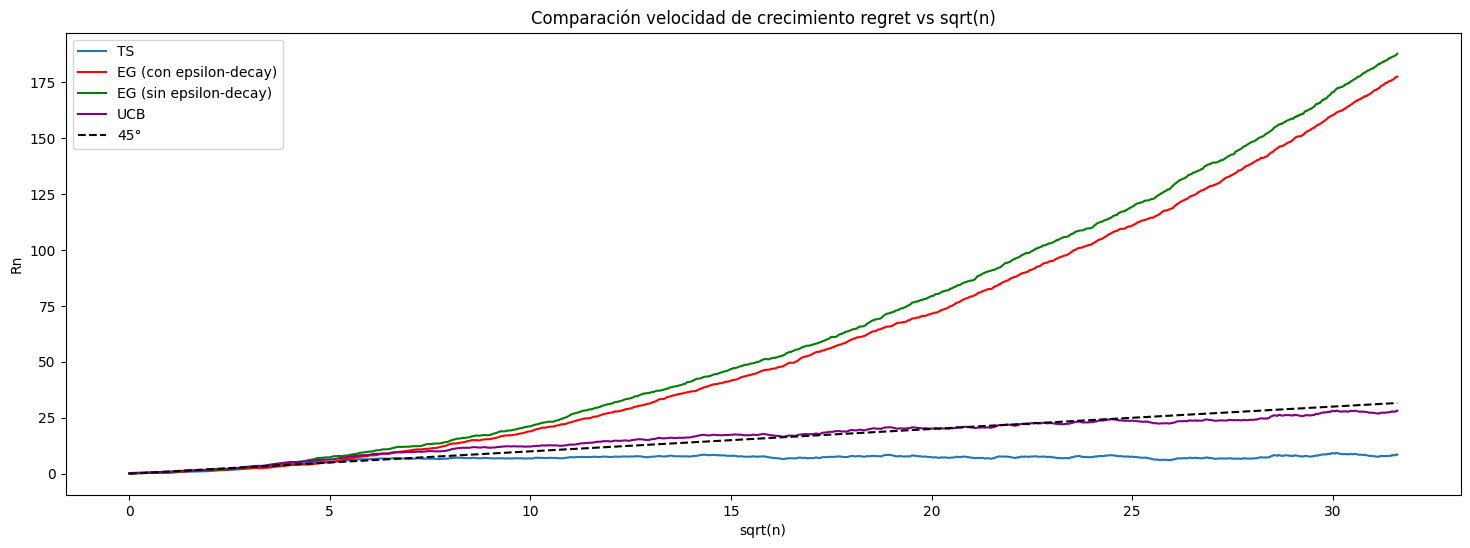

In [5]:
sl.plot_log_comparison()

### **Conclución caso 1**

Podríamos concluir en que, para casos en donde las probabilidades subyacentes son fácilmente separables, **Thompson Sampling** resulta el mejor modelo a utilizar.

---

# Caso 2
En este caso tenemos 3 máquinas con diferencias pequeñas en sus probabilidades, siendo las mismas 0.5, 0.52 y 0.54

In [6]:
sl = SimulationLab(
    actual_probs=[.5, .52, .54],
    repetitions=10,
    iterations=1000,
    epsilon=.15
)
sl.simulate()

Starting simulation...


 10%|█         | 1/10 [00:05<00:45,  5.03s/it]

Saving repetition 0...


 20%|██        | 2/10 [00:10<00:40,  5.01s/it]

Saving repetition 1...


 30%|███       | 3/10 [00:15<00:35,  5.08s/it]

Saving repetition 2...


 40%|████      | 4/10 [00:21<00:33,  5.56s/it]

Saving repetition 3...


 50%|█████     | 5/10 [00:28<00:29,  5.94s/it]

Saving repetition 4...


 60%|██████    | 6/10 [00:36<00:27,  6.85s/it]

Saving repetition 5...


 70%|███████   | 7/10 [00:43<00:20,  6.93s/it]

Saving repetition 6...


 80%|████████  | 8/10 [00:50<00:13,  6.84s/it]

Saving repetition 7...


 90%|█████████ | 9/10 [00:57<00:06,  6.76s/it]

Saving repetition 8...


100%|██████████| 10/10 [01:02<00:00,  6.26s/it]


Saving repetition 9...
Success!
Starting machine selection evolution calculus...


100%|██████████| 4/4 [00:08<00:00,  2.20s/it]

Success!


### Selección de máquinas

Como se observa en el gráfico de abajo, si bien al comienzo no es el modelo más certero, al rededor del paso de iteración n°100 podemos ver como el **Thompson Sampling** comienza a detectar que la máquina óptima es la n°2, para luego centrarse en ella y así convertirse en el método que pareciera funcionar mejor para este caso<br>
En cuanto al resto de los métodos, podemos ver que el **e-greedy** no performa bien, esto encuentra su lógica en la cercanía que seteamos entre las probabilidades reales subyasentes de las 3 máquinas, como este método tiende a seleccionar la máquina con mayor esperanza empírica, es posible que, por efecto del azar, el mismo detecte como óptima una máquina que no lo es. Si a esto le sumamos un epsilon-decay, vemos como el modelo performa aun peor, ya que realiza una apuesta mucho más fuerte sobre la máquina equivocada.<br>
Por último, el modelo de **UCB** pareciera detectar que la opción óptima es jugar a la máquina n°0 (la peor opción), siguiendo la máquina n°2 (la verdadera óptima) y terminando en la máquina n°1. <br>

In [7]:
fig = sl.plot_mab_selection()
py.iplot(fig, filename='evolucion_seleccion_caso2', sharing='public')

### Regret/n

Al avanzar en el análisis vemos que, **e-greedy sin epsilon-decay** y **Thompson sampling** son los modelos que más se acercan al 0 a medida que n tiene a infinito. 

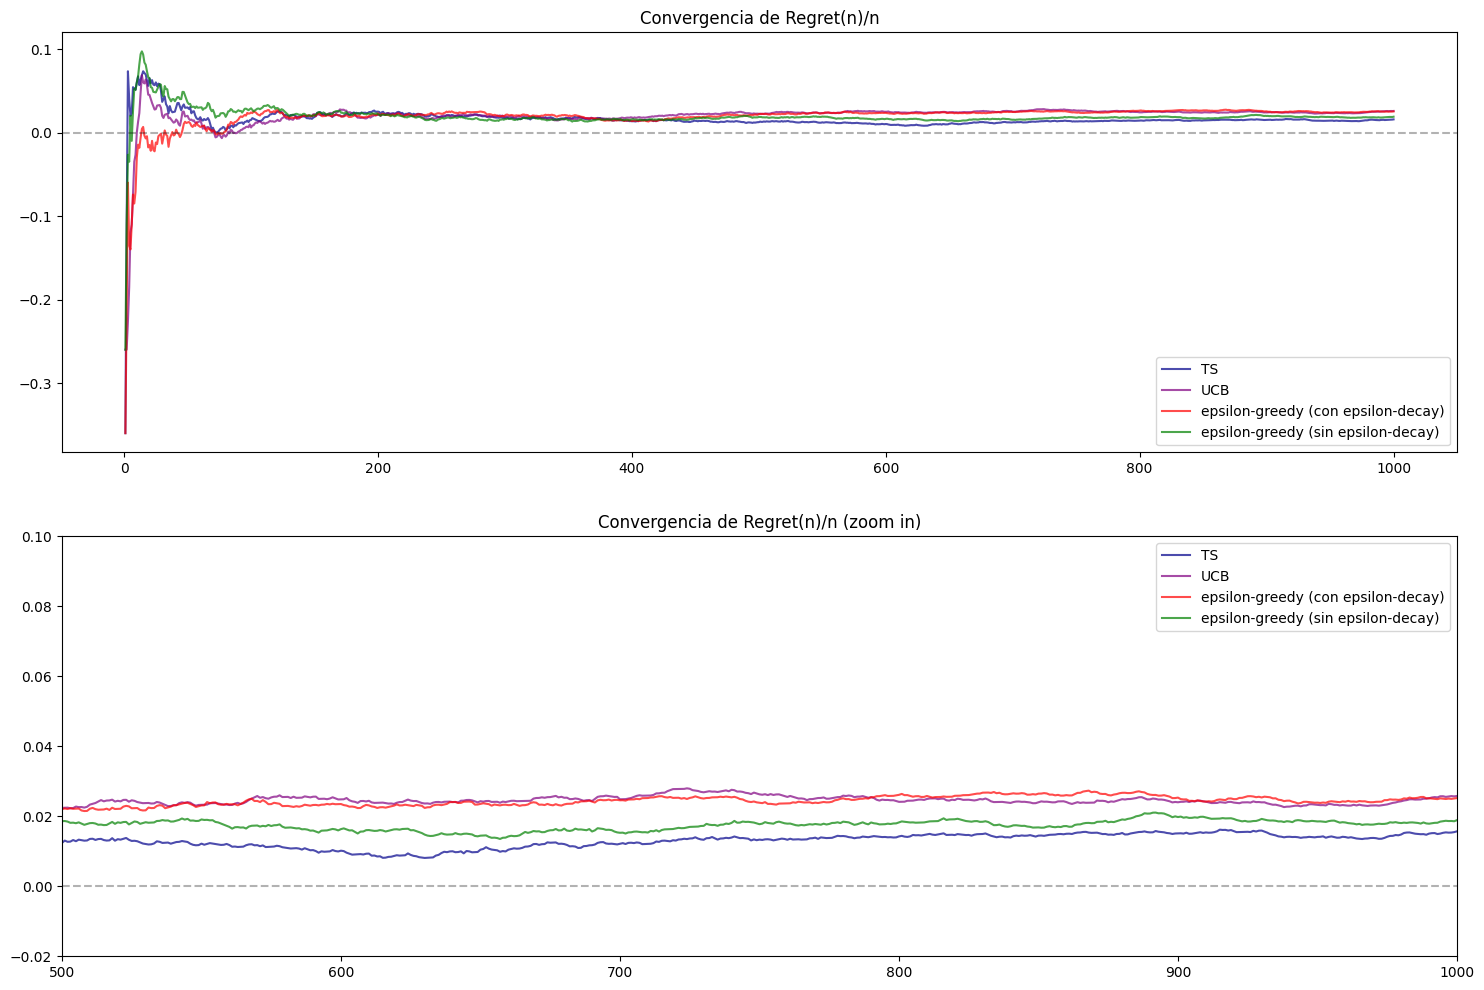

In [8]:
sl.plot_regret()

### Proporcionalidad vs $\sqrt{n}$

El siguiente gráfico no contradice lo ya expuesto ya que, al comprar la velocidad de crecimiento del Regret/n contra $\sqrt{n}$, vemos claramente que, al sobrepasar la iteración n°400, los modelos de **e-greedy con epsilon decay** y **Thompson sampling** son los 2 que crecen a un menor nivel. <br>
Cabe destacar que todos los modelos crecen a una velocidad menor que $\sqrt{n}$, esto encuentra su razón en la cercanía de las probabilidades subyacentes, ya que se genera un contexto en donde el regret por no jugar a la mejor opción es pequeño.

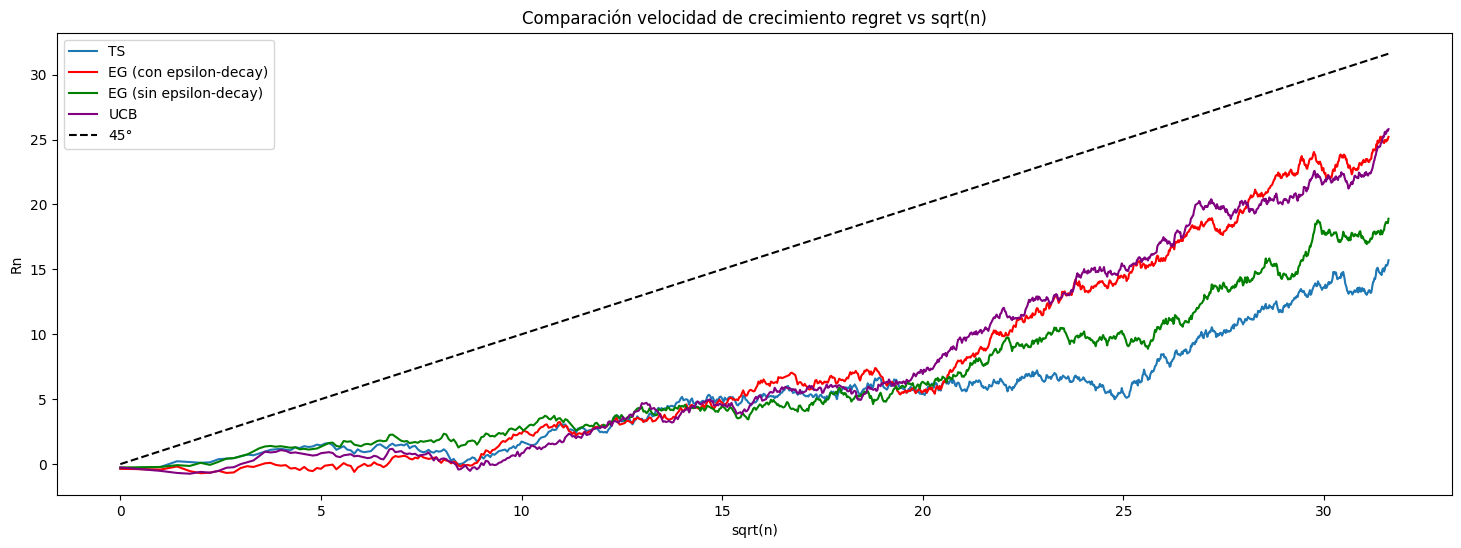

In [9]:
sl.plot_log_comparison()

### **Conclución caso 2**

Podríamos concluir en que, para casos en donde las probabilidades subyacentes se encuentran extremádamente cerca, **Thompson Sampling** resulta el mejor modelo a utilizar.

---

# Caso 3
En este caso tenemos 5 máquinas divididas en 2 grupos:
   * un grupo de 3 máquinas con probabilidades bajas similares; y 
   * un grupo de 2 máquinas con probabilidades más altas a las del grupo anterior, pero cercanas entre si

In [10]:
sl = SimulationLab(
    actual_probs=[.26, .25, .29, .37, .38],
    repetitions=10,
    iterations=1000,
    epsilon=.15
)
sl.simulate()

Starting simulation...


 10%|█         | 1/10 [00:09<01:28,  9.80s/it]

Saving repetition 0...


 20%|██        | 2/10 [00:20<01:20, 10.12s/it]

Saving repetition 1...


 30%|███       | 3/10 [00:29<01:07,  9.62s/it]

Saving repetition 2...


 40%|████      | 4/10 [00:37<00:54,  9.10s/it]

Saving repetition 3...


 50%|█████     | 5/10 [00:46<00:44,  8.99s/it]

Saving repetition 4...


 60%|██████    | 6/10 [00:54<00:35,  8.89s/it]

Saving repetition 5...


 70%|███████   | 7/10 [01:02<00:25,  8.52s/it]

Saving repetition 6...


 80%|████████  | 8/10 [01:10<00:16,  8.29s/it]

Saving repetition 7...


 90%|█████████ | 9/10 [01:18<00:08,  8.12s/it]

Saving repetition 8...


100%|██████████| 10/10 [01:26<00:00,  8.64s/it]


Saving repetition 9...
Success!
Starting machine selection evolution calculus...


100%|██████████| 4/4 [00:10<00:00,  2.53s/it]

Success!


### Selección de máquinas

Para este caso se da la particularidad que **Thompson sampling** comienza eligiendo la máquina óptima, pero alrededor de la iteración n°600, la 2da mejor máquina comienza a ser elegida en mayor proporción. Esto encuentra su razón en que las probabilidades reales de ambas máquinas se encuentran muy cercanas.<br>
En cuanto a los modelos de **e-greedy**, vemos que ambos logran seleccionar la mejor máquina entre un 39% y 45% de las iteraciones pero, a comparación con **Thompson sampling**, divergen gran parte del resto de las veces en máquinas poco óptimas (0, 1 y 2)<br>
Por último, el modelo **UCB** también logra seleccionar la mayor cantidad de veces a la máquina óptima pero, al igual que los **e-greedy**, diverge más que el **Thompson sampling**

In [11]:
fig = sl.plot_mab_selection()
py.iplot(fig, filename='evolucion_seleccion_caso3', sharing='public')

### Regret/n

Este análisis se condice con lo anteriormente expuesto, vemos claramente cómo **Thomspon sampling**, a pesar de no ser el modelo que selecciona la máquina óptima la mayor cantidad de veces, resulta el modelo óptimo a seleccionar.

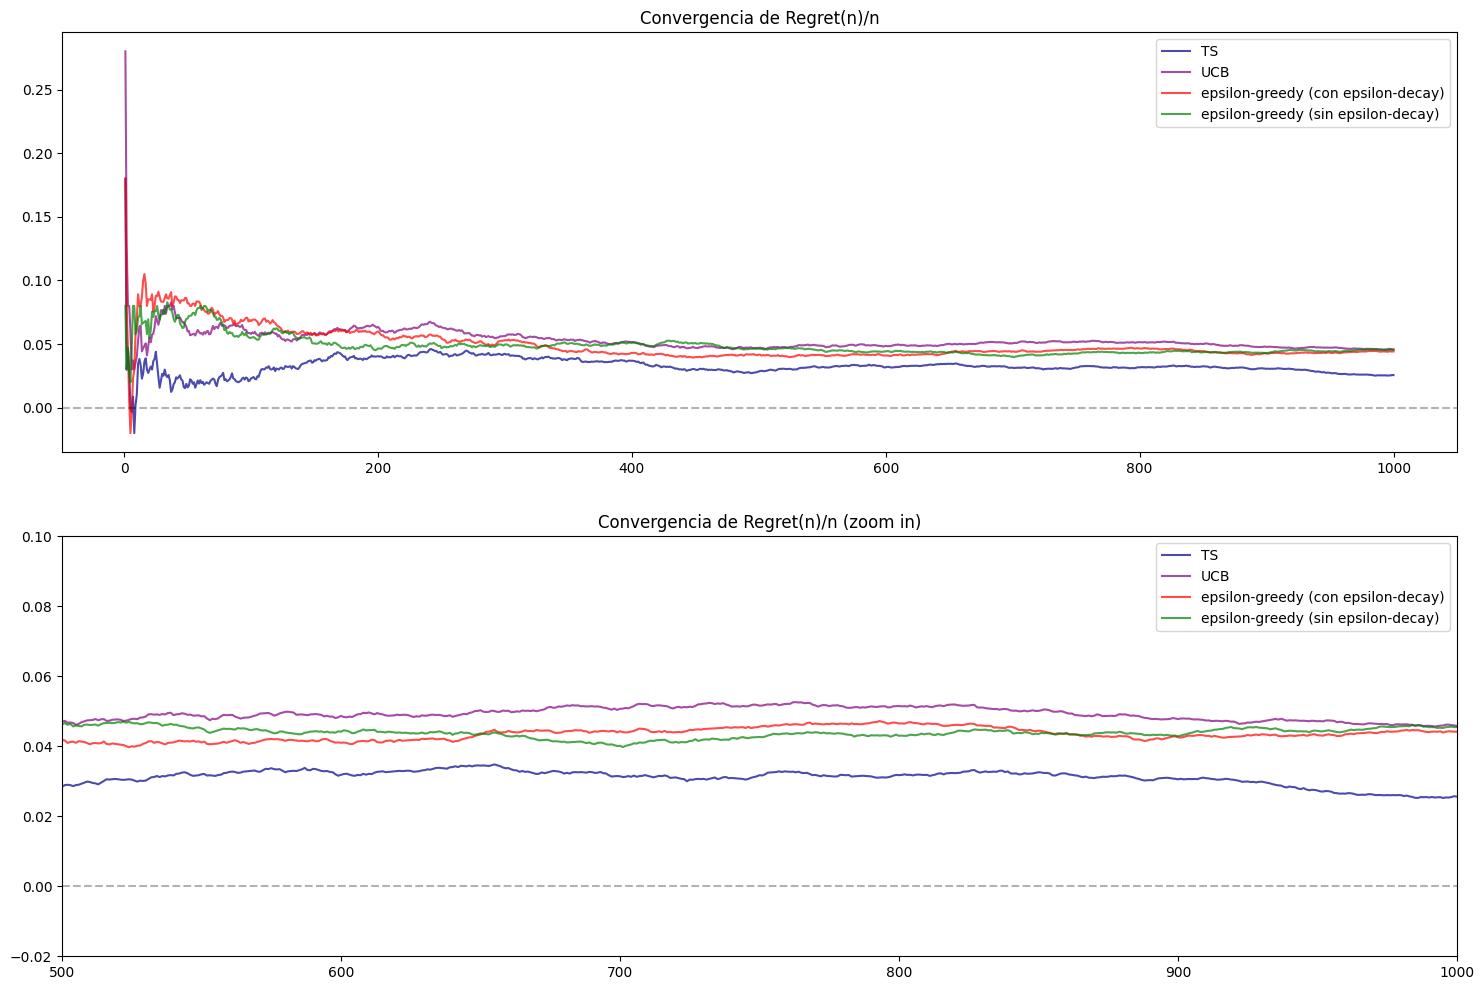

In [12]:
sl.plot_regret()

### Proporcionalidad vs $\sqrt{n}$

Al analizar la velocidad de crecimiento del Regret/n, vemos como el **Thompson sampling** es el único modelo que logra crecer a una tasa menor que $\sqrt{n}$ pasadas las 625 iteraciones.

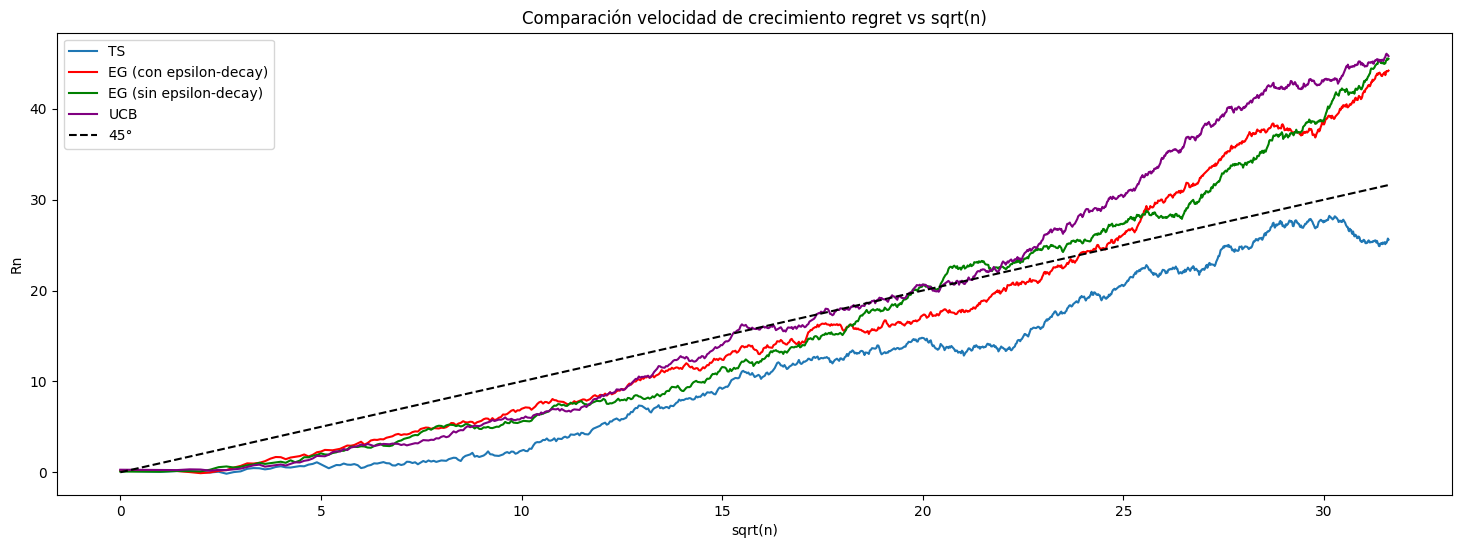

In [13]:
sl.plot_log_comparison()

### **Conclución caso 3**

Podríamos concluir en que, para casos en donde existen clusters de probabilidades subyacentes distanciados entre si, pero cercanos internamente, **Thompson Sampling** resulta el mejor modelo a utilizar.

---

# Caso 4
Este es el caso más complicado que presentamos, donde tenemos 10 máquinas con probabilidades cercanas entre si, pero con una clara mejor y peor opción.

In [14]:
sl = SimulationLab(
    actual_probs=[.22, .23, .22, .18, .25, .23, .27, .26, .30, .19],
    repetitions=10,
    iterations=1000,
    epsilon=.15
)
sl.simulate()

Starting simulation...


 10%|█         | 1/10 [00:13<02:00, 13.40s/it]

Saving repetition 0...


 20%|██        | 2/10 [00:26<01:47, 13.50s/it]

Saving repetition 1...


 30%|███       | 3/10 [00:40<01:34, 13.48s/it]

Saving repetition 2...


 40%|████      | 4/10 [00:54<01:23, 13.86s/it]

Saving repetition 3...


 50%|█████     | 5/10 [01:08<01:08, 13.72s/it]

Saving repetition 4...


 60%|██████    | 6/10 [01:21<00:54, 13.66s/it]

Saving repetition 5...


 70%|███████   | 7/10 [01:35<00:40, 13.64s/it]

Saving repetition 6...


 80%|████████  | 8/10 [01:49<00:27, 13.69s/it]

Saving repetition 7...


 90%|█████████ | 9/10 [02:03<00:13, 13.79s/it]

Saving repetition 8...


100%|██████████| 10/10 [02:17<00:00, 13.70s/it]


Saving repetition 9...
Success!
Starting machine selection evolution calculus...


100%|██████████| 4/4 [00:15<00:00,  3.94s/it]

Success!


### Selección de máquinas

Resulta interesante observar como **Thompson sampling** y **e-greedy con epsilon-decay** son los 2 modelos que mejor performan. Sin embargo cabe destacar una peculiaridad, si vemos cómo evolucionan a lo largo del tiempo, se detecta que, a medida que avanzan las iteraciones, **Thompson sampling** comienza a seleccionar más veces la máquina óptima, mientras que el **e-greedy** mantiene una proporcionalidad con las máquinas 0 y 1.<br>
En cuanto al modelo de **UCB**, vemos que le cuesta encontrar alguna opción óptima y que su patron de selección se asemeja al de una selección al azar.

In [15]:
fig = sl.plot_mab_selection()
py.iplot(fig, filename='evolucion_seleccion_caso4', sharing='public')

### Regret/n

Vemos como el Regret(n) es mayor vs el de los casos anteriores, esto es por cómo seteamos este caso en particular, ya que es mucho más complejo y existe una mayor cantidad de opciones a elegir. Del gráfico además se destaca que el **Thompson sampling** es el que presenta menores valores de regret.

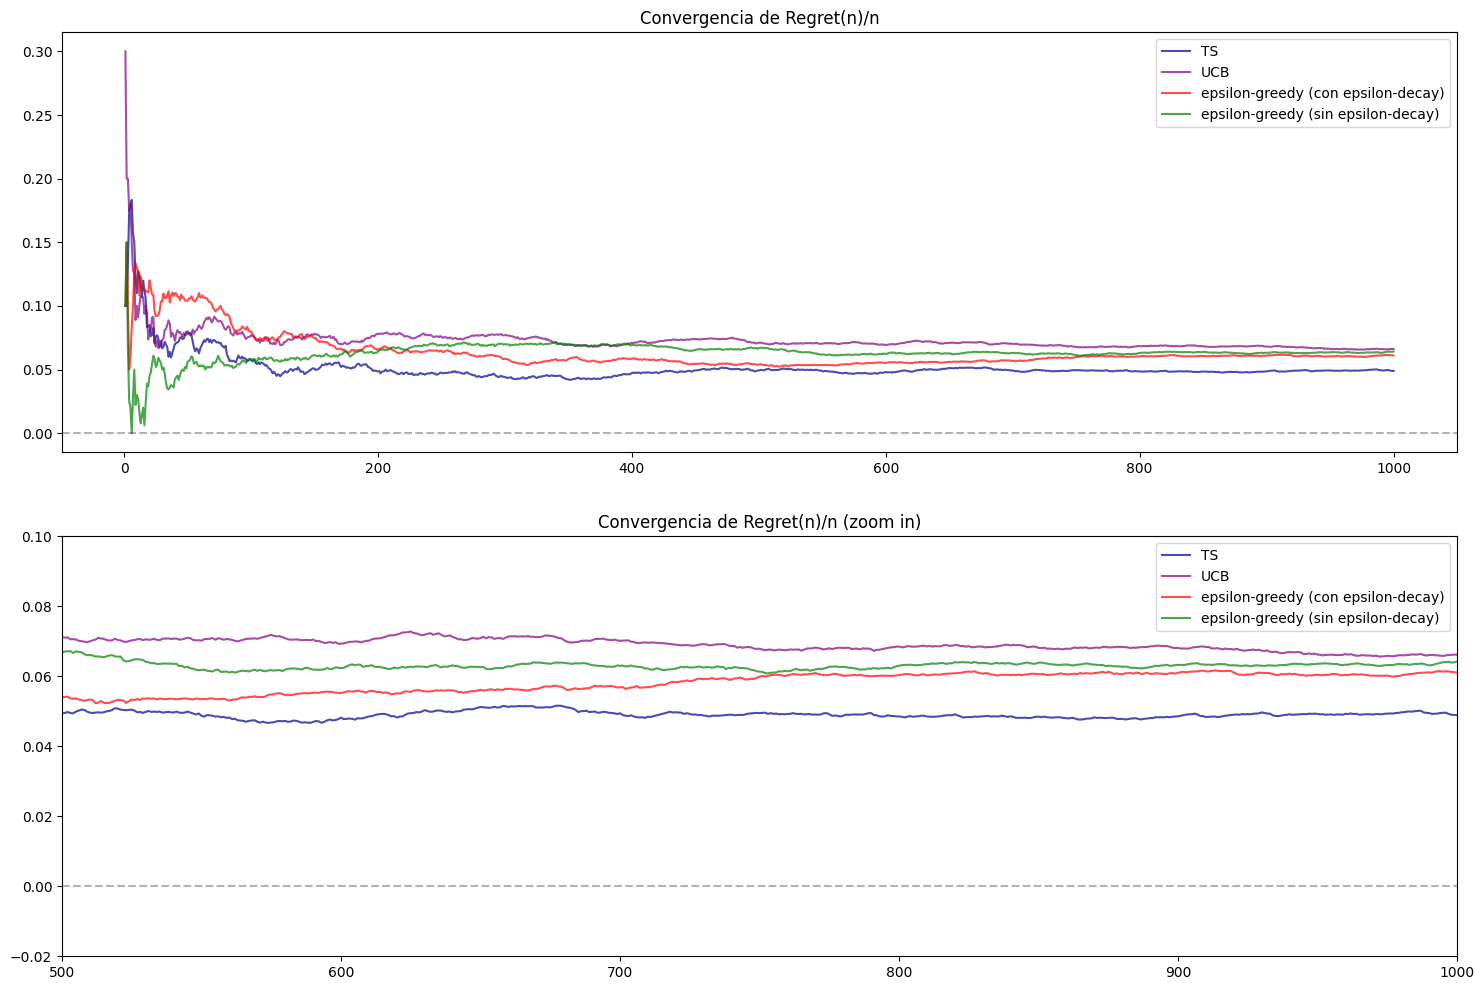

In [16]:
sl.plot_regret()

### Proporcionalidad vs $\sqrt{n}$

Por último, en nuestro análisis de velocidad de crecimiento del regret, vemos como todos los modelos crecen a una velocidad mayor que $\sqrt{n}$ pasadas las 480 iteraciones, pero **Thompson sampling** es el que lo hace a una tasa menor.

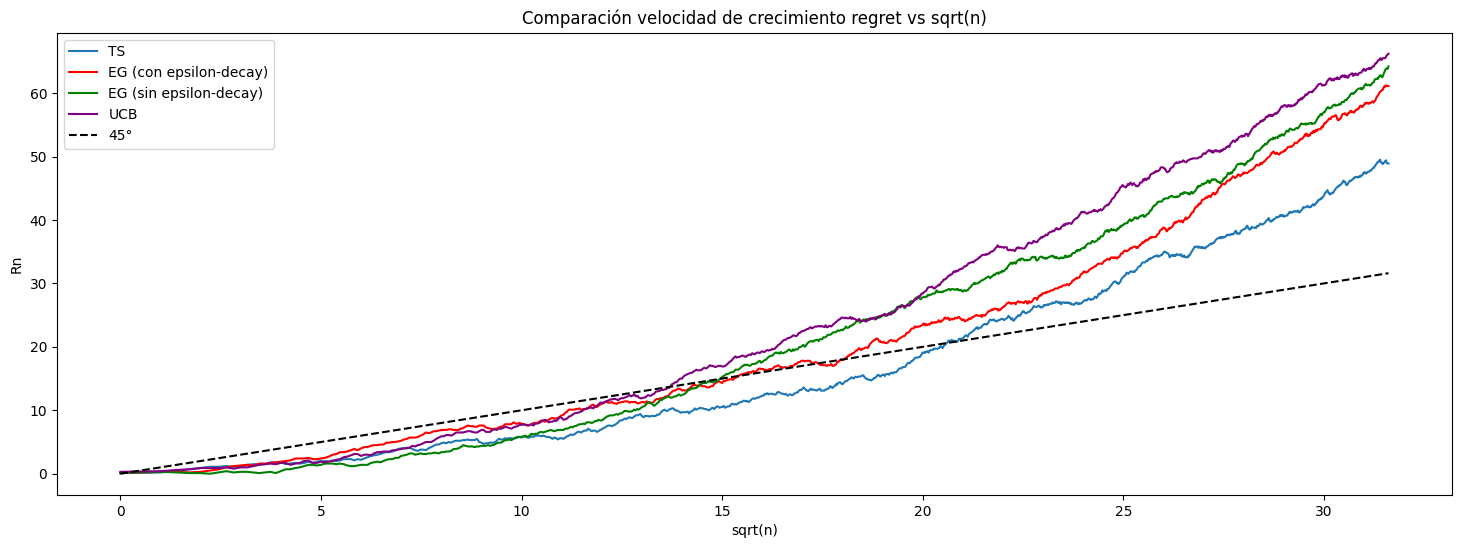

In [17]:
sl.plot_log_comparison()

### **Conclución caso 4**

Como ya se expuso anteriormente, este es el caso que presenta una mayor dificultad en su resolución, esto queda claro cuando vemos el gráfico de crecimiento del regret vs $\sqrt{n}$ donde ninguno de los modelos consigue mantenerse por debajo de esta velocidad. Sin embargo, podemos concluír que, de los modelos probados, **Thompson Sampling** pareciera ser el mejor modelo a utilizar.

---

*El código con el que fue generado este estudio se puede encontrar en <a link=https://github.com/ndominutti/thompson_sampling>https://github.com/ndominutti/thompson_sampling</a>*